# Why Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import time

## Importing Data

In [2]:
data = pd.read_csv('data/Housing_data.csv')

In [3]:
data.head()

,Area,NumBedrooms,Floors,Age,SalePrice
0,8450,3,2,17,208500
1,9600,3,1,44,181500
2,11250,3,2,19,223500
3,9550,3,2,105,140000
4,14260,4,2,20,250000


## Normal Equations Method

In [4]:
# initializing variables
X = np.array(data[['Area','NumBedrooms','Floors','Age','SalePrice']])
y = np.array(data['SalePrice'])

# making y a column vector
y = y.reshape((-1,1))

# appending column of 1 to X
X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)

In [5]:
print("X=\n", X, "\n")
print("y=\n", y)

X=
 [[1.00000e+00 8.45000e+03 3.00000e+00 2.00000e+00 1.70000e+01 2.08500e+05]
 [1.00000e+00 9.60000e+03 3.00000e+00 1.00000e+00 4.40000e+01 1.81500e+05]
 [1.00000e+00 1.12500e+04 3.00000e+00 2.00000e+00 1.90000e+01 2.23500e+05]
 ...
 [1.00000e+00 9.04200e+03 4.00000e+00 2.00000e+00 7.90000e+01 2.66500e+05]
 [1.00000e+00 9.71700e+03 2.00000e+00 1.00000e+00 7.00000e+01 1.42125e+05]
 [1.00000e+00 9.93700e+03 3.00000e+00 1.00000e+00 5.50000e+01 1.47500e+05]] 

y=
 [[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


In [6]:
start = time.time()

# normal equation
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

end = time.time()
print("Successfully executed in {:.2f}s".format(end - start))

Successfully executed in 0.00s


In [7]:
print("theta=\n", theta) 

theta=
 [[ 7.41494114e-05]
 [ 2.01065831e-11]
 [-9.52816390e-06]
 [-7.11272878e-06]
 [-2.97000483e-07]
 [ 1.00000000e+00]]


In [8]:
print("y_hat(1) = ", np.round(np.sum(theta.T*X[0]), decimals=2), "\ny(1) = ", y[0][0])

y_hat(1) =  208500.0 
y(1) =  208500


## Gradient Descent

In [9]:
learning_rate = 1e-11
theta = np.random.randn(X.shape[1], 1)
n_iterations = int(1e5)
m = X.shape[0]

In [10]:
def compute_cost(h, m, y, theta):
    residuals = (h - y)
    s_error = np.dot(residuals.T, residuals)
    return np.sum(s_error)/(2 * m)

In [11]:
J_history = {}
start = time.time()

for i in range(1, n_iterations+1):
    
    h = np.dot(X, theta)
    residuals = h - y
    theta = theta - (learning_rate * ((1/m) * np.dot(X.T, residuals)))
    
    if(i%1000 == 0):
        J_history[i] = compute_cost(h, m, y, theta)

end = time.time()
print("Successfully executed in {:.2f}s".format(end - start))

Successfully executed in 1.34s


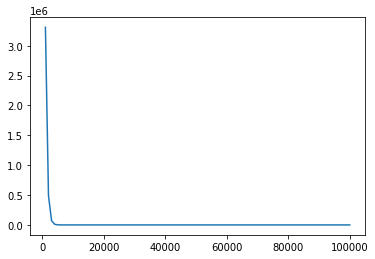

In [12]:
plt.plot(J_history.keys(), J_history.values())
plt.show()

In [13]:
print("theta=\n", theta) 

theta=
 [[ 3.79455252e-01]
 [-1.05216683e-05]
 [ 7.39279278e-01]
 [-6.75735584e-01]
 [-8.19312745e-03]
 [ 9.99994673e-01]]


In [14]:
print("y_hat(1) = ", np.round(np.sum(theta.T*X[0]), decimals=2), "\ny(1) = ", y[0][0])

y_hat(1) =  208499.91 
y(1) =  208500
